In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
path =r'/Users/ckuhn/Documents/DFO_Accuracy/data/' # use your path
allFiles = glob.glob(path + "/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

In [4]:
df = df.drop(['system:index','.geo'], axis=1)

In [5]:
df.head()

,Flood Algorithm,Flood ID,accuracy,fMeasure,fn,fp,precision,recall,tn,tp
0,MODIS,1,0.985255,0.950298,66,34,0.965657,0.935421,5726,956
1,MODIS_Otsu,1,0.834710,0.642880,13,1108,0.476618,0.987280,4652,1009
0,MODIS,10,0.949827,0.938001,228,4,0.997726,0.885023,2637,1755
1,MODIS_Otsu,10,0.967993,0.961678,126,22,0.988292,0.936460,2619,1857
0,MODIS,11,0.834451,0.653333,17,1439,0.488083,0.987761,5967,1372


In [6]:
df.shape

(26, 10)

In [7]:
stats = pd.melt(df, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')
stats.head(5)

,Flood Algorithm,Flood ID,Metric,Score
0,MODIS,1,accuracy,0.985255
1,MODIS_Otsu,1,accuracy,0.834710
2,MODIS,10,accuracy,0.949827
3,MODIS_Otsu,10,accuracy,0.967993
4,MODIS,11,accuracy,0.834451


In [8]:
MODIS = stats.loc[stats['Flood Algorithm'].isin(['MODIS'])]
MODIS_Otsu = stats.loc[stats['Flood Algorithm'].isin(['MODIS_Otsu'])]

MODIS_Otsu.groupby('Metric').describe()

Flood ID                                                  Score  \
             count       mean       std  min  25%   50%   75%   max count   
Metric                                                                      
accuracy      13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   
fMeasure      13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   
fn            13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   
fp            13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   
precision     13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   
recall        13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   
tn            13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   
tp            13.0  11.230769  5.761277  1.0  6.0  12.0  16.0  19.0  13.0   

                                                                              \
                   mean           std          min          25%          50%   
Metric                                                                         
accuracy       0.916807      0.058746     0.834710     0.852011     0.946696   
fMeasure       0.718333      0.192453     0.360000     0.642880     0.804638   
fn           339.000000    646.067076     5.000000    13.000000    29.000000   
fp           496.615385    490.474692    21.000000    89.000000   431.000000   
precision      0.690919      0.242502     0.236842     0.493909     0.765506   
recall         0.854287      0.209236     0.249171     0.795439     0.936460   
tn         11941.000000  15791.203121  1271.000000  3620.000000  6113.000000   
tp          1734.230769   2022.536203    18.000000  1009.000000  1368.000000   

                                      
                   75%           max  
Metric                                
accuracy      0.967993      0.981091  
fMeasure      0.854110      0.961678  
fn          126.000000   2081.000000  
fp          675.000000   1371.000000  
precision     0.835185      0.988517  
recall        0.984881      0.996277  
tn         9701.000000  54167.000000  
tp         1769.000000   8092.000000

In [9]:
precRecall = stats.loc[stats['Metric'].isin(['precision','recall'])]
precRecall['Score']  = precRecall['Score'].multiply(100)
precRecall.groupby('Metric').describe()

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Flood ID                                                  Score  \
             count       mean       std  min  25%   50%   75%   max count   
Metric                                                                      
precision     26.0  11.230769  5.644875  1.0  6.0  12.0  16.0  19.0  26.0   
recall        26.0  11.230769  5.644875  1.0  6.0  12.0  16.0  19.0  26.0   

                                                                             \
                mean        std        min        25%        50%        75%   
Metric                                                                        
precision  76.243877  23.268085  23.684211  57.099910  81.383212  96.449437   
recall     83.397163  19.508626  24.917127  76.135973  91.612749  96.294682   

                      
                 max  
Metric                
precision  99.772598  
recall     99.627699

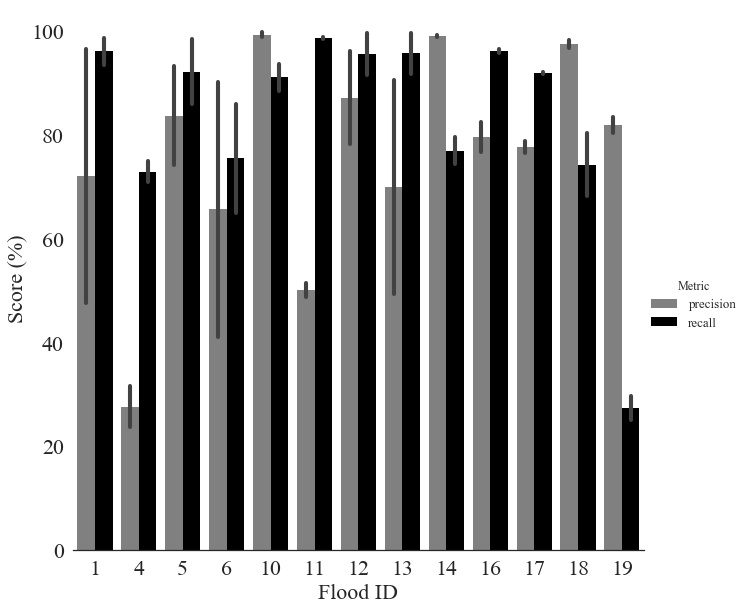

In [10]:
# Draw a nested barplot to show survival for class and sex
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman", size = 60)
    plt.rc('xtick', labelsize=22) 
    plt.rc('ytick', labelsize=22) 
set_style()   

flatui = ["grey", "black"]


g = sns.factorplot(x="Flood ID", y="Score", hue="Metric", data=precRecall,
                   size=10, kind="bar", palette= flatui)

g.despine(left=True)
g.set_ylabels("Score (%)", size = 22)
g.set_xlabels("Flood ID", size = 22)

In [11]:
confusionMatrix = stats.loc[stats['Metric'].isin(['fn','fp',  'tp'])]
confusionMatrix.groupby('Metric').describe()

Flood ID                                                  Score  \
          count       mean       std  min  25%   50%   75%   max count   
Metric                                                                   
fn         26.0  11.230769  5.644875  1.0  6.0  12.0  16.0  19.0  26.0   
fp         26.0  11.230769  5.644875  1.0  6.0  12.0  16.0  19.0  26.0   
tp         26.0  11.230769  5.644875  1.0  6.0  12.0  16.0  19.0  26.0   

                                                                        
               mean          std   min     25%     50%     75%     max  
Metric                                                                  
fn       374.269231   681.350985   5.0   21.25   104.0   246.0  2614.0  
fp       360.461538   456.459788   4.0   49.00   121.0   480.5  1439.0  
tp      1698.961538  1913.570348  17.0  969.25  1370.0  1752.0  8092.0

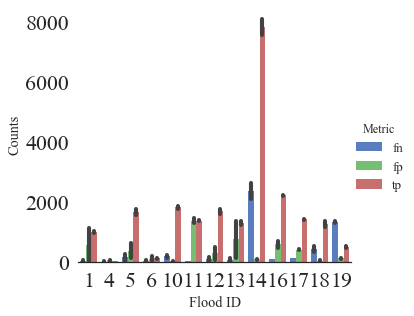

In [12]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Flood ID", y="Score", hue="Metric", data=confusionMatrix,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Counts")

### Factor Plots

https://seaborn.pydata.org/generated/seaborn.factorplot.html

In [13]:
stats = pd.melt(df, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')
stats.head(1)

,Flood Algorithm,Flood ID,Metric,Score
0,MODIS,1,accuracy,0.985255


In [14]:
stats.shape

(208, 4)

In [15]:
percents = stats.loc[stats['Metric'].isin(['precision','recall', 'accuracy', 'fMeasure'])]
percents['%'] = percents['Score'] *100

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
percents.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID     Score          %
Metric    Flood Algorithm                                
accuracy  MODIS            11.230769  0.945412  94.541238
          MODIS_Otsu       11.230769  0.916807  91.680680
fMeasure  MODIS            11.230769  0.797735  79.773530
          MODIS_Otsu       11.230769  0.718333  71.833251
precision MODIS            11.230769  0.833959  83.395862
          MODIS_Otsu       11.230769  0.690919  69.091893
recall    MODIS            11.230769  0.813656  81.365614
          MODIS_Otsu       11.230769  0.854287  85.428712

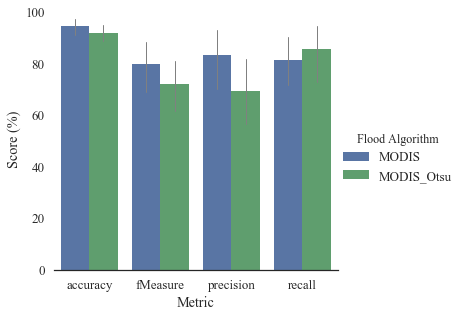

In [17]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

g = sns.factorplot(x="Metric", y="%", data = percents, hue="Flood Algorithm", size=6, kind="bar", errcolor='grey', errwidth=1)

g.despine(left=True)
g.set_ylabels("Score (%)")

plt.savefig('accuracy_Overall.png', dpi = 600)

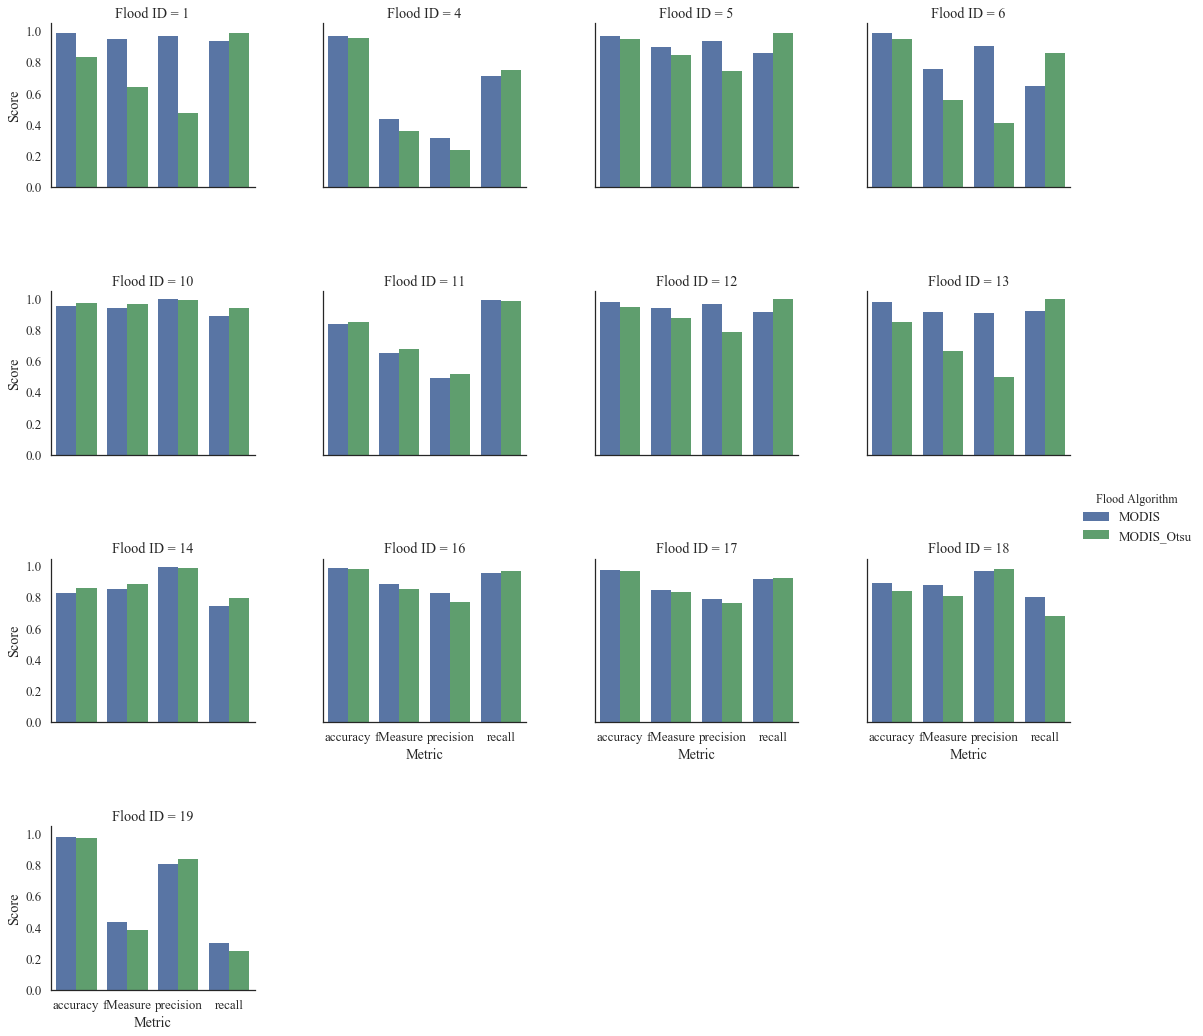

In [18]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

g = sns.factorplot(x="Metric", y="Score", col="Flood ID", col_wrap=4,hue="Flood Algorithm",
                  data=percents[percents.Score.notnull()],
                  kind="bar")


plt.savefig('accuracy_byEvent.png', dpi = 600)

In [19]:
confusionMatrix = stats.loc[stats['Metric'].isin(['fn', 'fp', 'tp'])]
confusionMatrix.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID        Score
Metric Flood Algorithm                        
fn     MODIS            11.230769   409.538462
       MODIS_Otsu       11.230769   339.000000
fp     MODIS            11.230769   224.307692
       MODIS_Otsu       11.230769   496.615385
tp     MODIS            11.230769  1663.692308
       MODIS_Otsu       11.230769  1734.230769

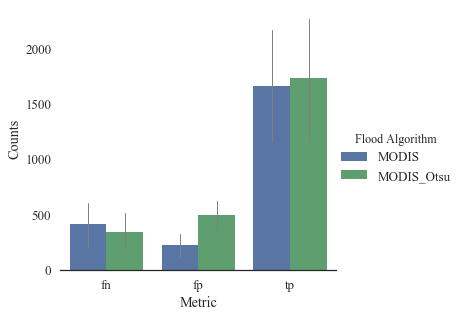

In [20]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   


g = sns.factorplot(x="Metric", y="Score", hue="Flood Algorithm", data=confusionMatrix, size=6, kind="bar", errcolor='grey', errwidth=1, ci=68)
g.despine(left=True)
g.set_ylabels("Counts")

plt.savefig('confusionMatrix_overall.png', dpi = 600)

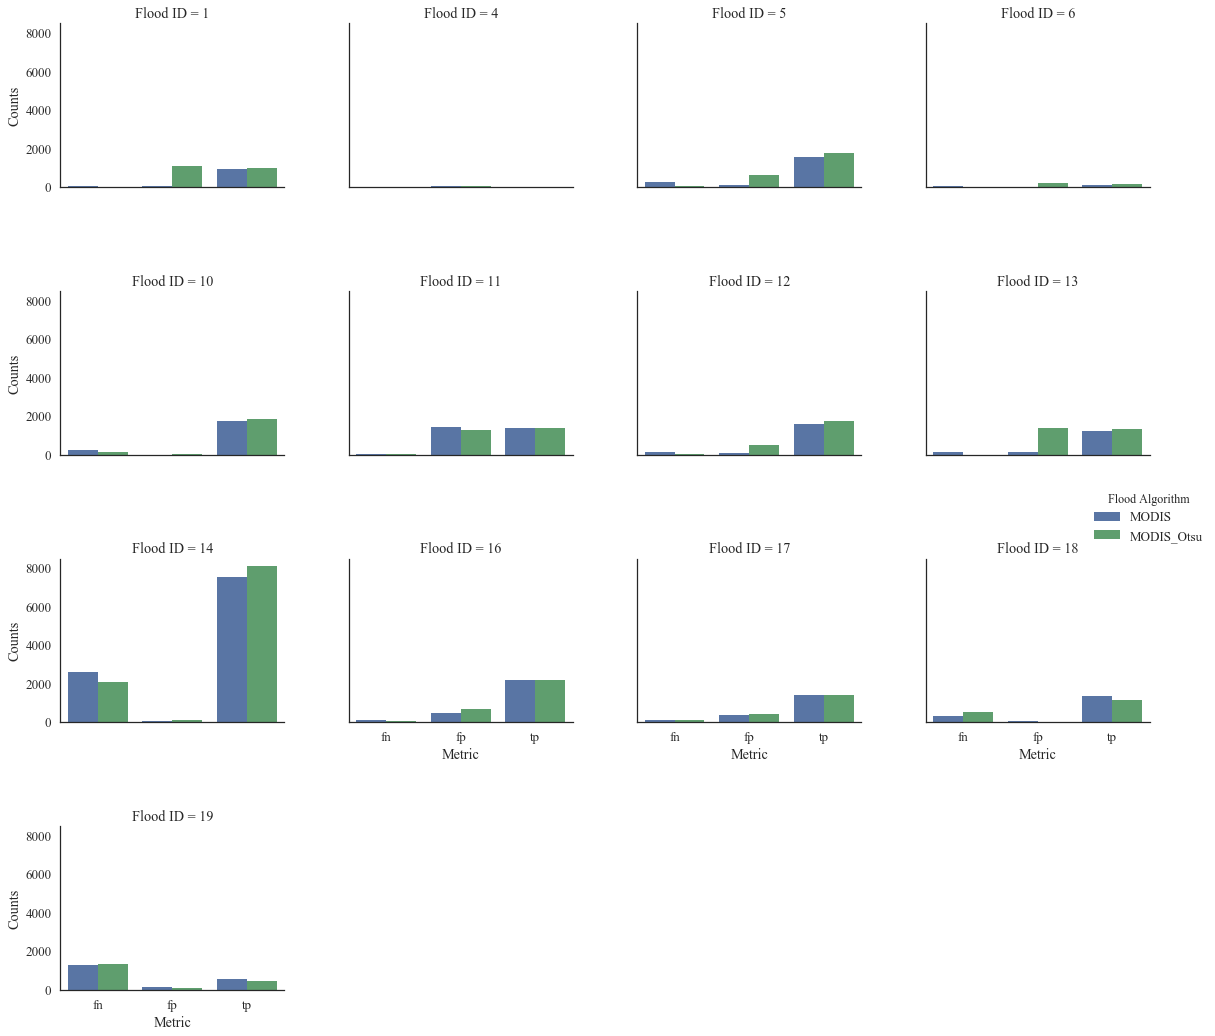

In [21]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   


g = sns.factorplot(x="Metric", y="Score", col="Flood ID", col_wrap=4,hue="Flood Algorithm",
                  data=confusionMatrix[confusionMatrix.Score.notnull()],
                  kind="bar")
g.set_ylabels("Counts")

plt.tight_layout()

plt.savefig('confusionMatrix_byEvent.png', dpi = 600)

## Beth's AGU Talk

In [22]:
miss_flood = percents.loc[percents['Flood ID'].isin([14])]
miss_flood = miss_flood.loc[miss_flood['Metric'].isin(['accuracy', 'precision', 'recall'])]

miss_flood

,Flood Algorithm,Flood ID,Metric,Score,%
10,MODIS,14,accuracy,0.825337,82.533665
11,MODIS_Otsu,14,accuracy,0.857825,85.782455
114,MODIS,14,precision,0.992385,99.238545
115,MODIS_Otsu,14,precision,0.988517,98.851698
140,MODIS,14,recall,0.743045,74.304532
141,MODIS_Otsu,14,recall,0.795439,79.543891


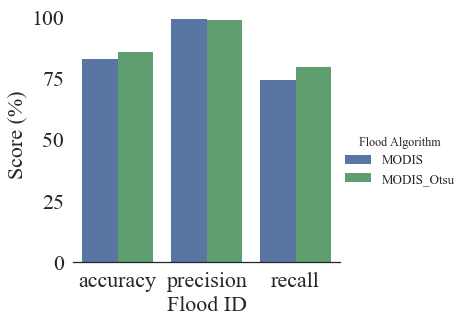

In [23]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman", size = 60)
    plt.rc('xtick', labelsize=22) 
    plt.rc('ytick', labelsize=22) 
set_style()   
  
g = sns.factorplot(x="Metric", y="%", data = miss_flood, hue="Flood Algorithm", size=6, kind="bar", errcolor='grey', errwidth=1)

g.despine(left=True)
g.set_ylabels("Score (%)", size = 22)
g.set_xlabels("Flood ID", size = 22)


plt.savefig('Flood12_accuracy_Overall.png', dpi = 600)

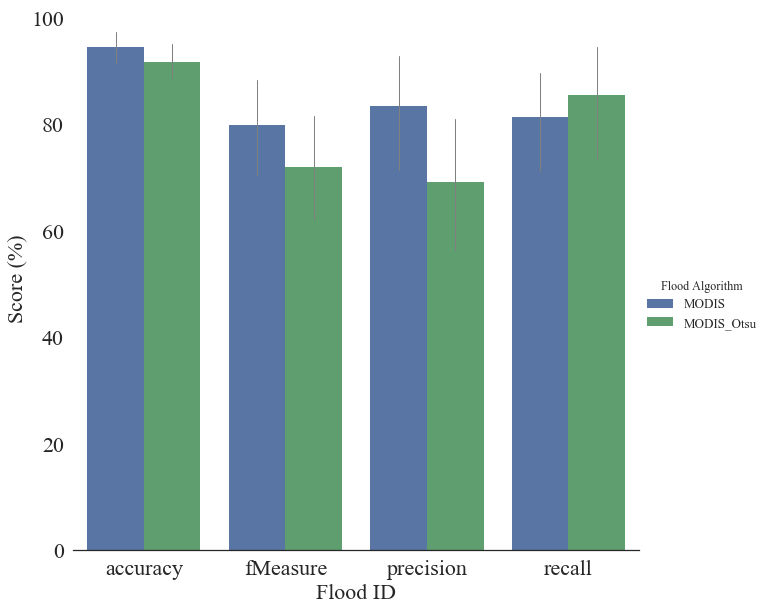

In [24]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman", size = 60)
    plt.rc('xtick', labelsize=22) 
    plt.rc('ytick', labelsize=22) 
set_style()   
  

g = sns.factorplot(x="Metric", y="%", data = percents, hue="Flood Algorithm", size=10, kind="bar", errcolor='grey', errwidth=1)

g.despine(left=True)
g.set_ylabels("Score (%)", size = 22)
g.set_xlabels("Flood ID", size = 22)

plt.savefig('Flood14_accuracy_Overall.png', dpi = 600)

In [37]:
recall = percents.loc[percents['Metric'].isin(['recall'])]
precision = percents.loc[percents['Metric'].isin(['precision'])]
accuracy = percents.loc[percents['Metric'].isin(['accuracy'])]

recall_MODIS = recall.loc[recall['Flood Algorithm'].isin(['MODIS'])]
recall_MODISOtsu =recall.loc[recall['Flood Algorithm'].isin(['MODIS_Otsu'])]

prec_MODIS = precision.loc[precision['Flood Algorithm'].isin(['MODIS'])]
prec_MODISOtsu =precision.loc[precision['Flood Algorithm'].isin(['MODIS_Otsu'])]

acc_MODIS = accuracy.loc[accuracy['Flood Algorithm'].isin(['MODIS'])]
acc_MODISOtsu =accuracy.loc[accuracy['Flood Algorithm'].isin(['MODIS_Otsu'])]

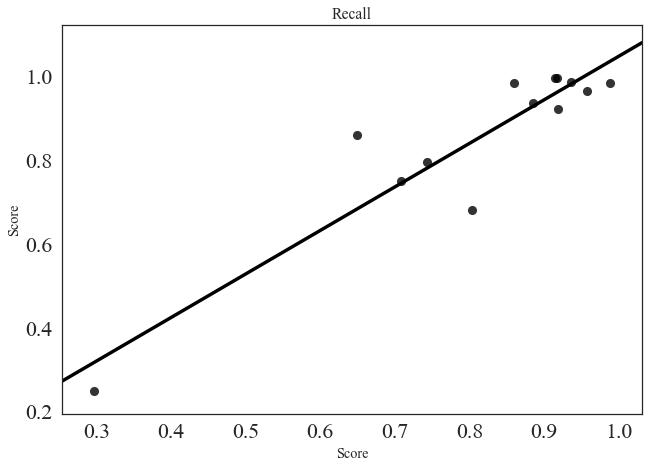

In [56]:
x = recall_MODIS['Score']
y = recall_MODISOtsu['Score']
g = sns.regplot(x, y, ci=None, color="black")
g.set_title("Recall")

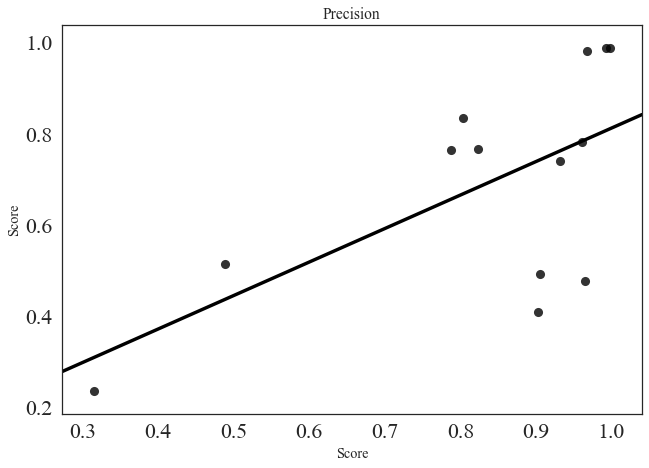

In [53]:
x = prec_MODIS['Score']
y = prec_MODISOtsu['Score']
g = sns.regplot(x, y, ci = None, color="black")
g.set_title("Precision")

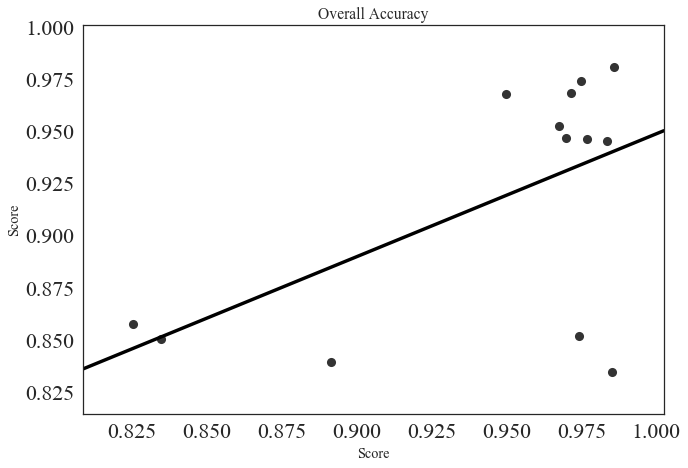

In [54]:
x = acc_MODIS['Score']
y = acc_MODISOtsu['Score']
g = sns.regplot(x, y, ci=None, color="black")
g.set_title("Overall Accuracy")

IndexError: too many indices for array

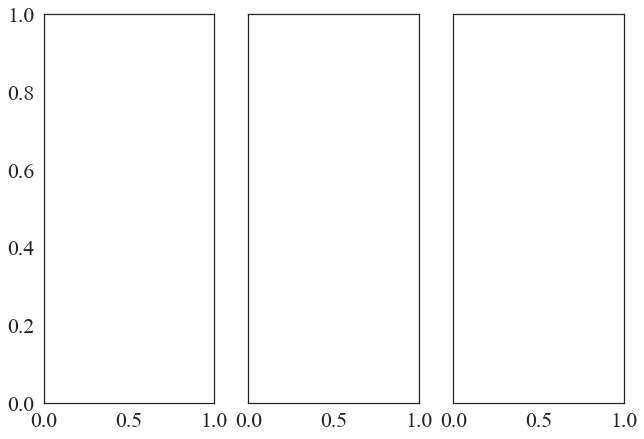

In [62]:
fig, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True)

#axes[0, 0].set_title('Scatterplot')
axes[0, 0].sns.regplot(x, y, ci=None, color="black")

axes[0, 1].set_title('Hexbin plot')
axes[0, 1].hexbin(x, y, gridsize=nbins)

axes[1, 0].set_title('2D Histogram')
axes[1, 0].hist2d(x, y, bins=nbins)

fig.tight_layout()
plt.show()
